Masukkan library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load Dataset

In [3]:
import pandas as pd

data = pd.read_csv('dataset_sms_spam_v1.csv')
data.head()

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


Text Prepocessing

## Preview Data

Total Jumlah SMS: 1143 data

terdiri dari (label):
-- [0] SMS Normal	: 569 data
-- [1] Fraud / Penipuan	: 335 data
-- [2] Promo		: 239 data



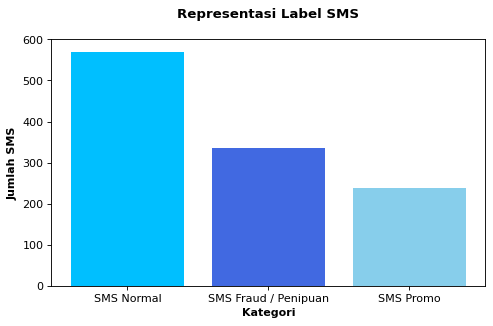

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print('Total Jumlah SMS:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] SMS Normal\t:', data[data.label == 0].shape[0], 'data')
print('-- [1] Fraud / Penipuan\t:', data[data.label == 1].shape[0], 'data')
print('-- [2] Promo\t\t:', data[data.label == 2].shape[0], 'data\n')

height = data['label'].value_counts()
labels = ('SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Representasi Label SMS\n', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah SMS', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)

plt.savefig('representasi label.png') # save plot

#@PREPOCESSING

Case Folding

In [4]:
import re

def casefolding(text):
    text = text.lower() # merubah bentuk menjadi lower case
    text = re.sub(r'https?://\S|www\.\S+', '', text) # menghapus url dari kalimat
    text = re.sub(r'[-+]?[0-9]+', '', text) # menghapus angka dari kalimat
    text = re.sub(r'[^\w\s]','',text) # menghapus tanda baca
    text = text.strip()
    return text


In [5]:
## membandingkan before and after case folding
raw_sample = data['teks'].iloc[2]
case_folding = casefolding(raw_sample)

print('Raw data\t : ',raw_sample)
print('case folding\t :', case_folding)

Raw data	 :  2016-07-08 11:47:11.Plg Yth, sisa kuota Flash Anda 478KB. Download MyTelkomsel apps di http://tsel.me/tsel utk cek kuota&beli paket Flash atau hub *363#
case folding	 : plg yth sisa kuota flash anda kb download mytelkomsel apps di selmetsel utk cek kuotabeli paket flash atau hub


WORD NORMALIZATION

In [7]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] 
    if (key_norm["singkat"] == word).any() 
    else word for word in text.split()])
    text = str.lower(text)
    return text

In [8]:
#membandingkan before and after word normalization

raw_data = data['teks'].iloc[696]
word_normal = text_normalize(case_folding)

print('Raw Data\t :', raw_data)
print('Word_Normalize\t :', word_normal)

Raw Data	 : Btw magicomnya yg sedang Gais, gaada yg gede
Word_Normalize	 : pulang yang terhormat sisa kuota flash anda kb download mytelkomsel apps di selmetsel untuk cek kuotabeli paket flash atau hubungi


FILTERING (STOPWORD REMOVAL)

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [10]:
len(stopwords_ind)

758

In [11]:
#melihat daftar stopword dari nltk
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [12]:
# membuat fungsi   stopword removal

# manambahkan kata dalam stopword
more_stopword = ['tsel', 'gb', 'rb', 'btw']
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_word(text):
    clean_words = []
    text =text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [13]:
raw_sample = data['teks'].iloc[696]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_word(case_folding)

print('Raw Data \t\t :', raw_data)
print('Case Folding \t\t :', case_folding)
print('Stopword Rreomoval \t\t :', stopword_removal)

Raw Data 		 : Btw magicomnya yg sedang Gais, gaada yg gede
Case Folding 		 : btw magicomnya yg sedang gais gaada yg gede
Stopword Rreomoval 		 : magicomnya yg gais gaada yg gede


In [36]:
# merubah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# membuat fungsi untuk stemming bahasa indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [14]:
# merubah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# membuat fungsi untuk stemming bahasa indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text


In [15]:
raw_sample = data['teks'].iloc[696]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_word(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw Data \t\t :', raw_data)
print('Case Folding \t\t :', case_folding)
print('Stopword Rreomoval \t\t :', stopword_removal)
print('Stemming \t\t :', text_stemming)

Raw Data 		 : Btw magicomnya yg sedang Gais, gaada yg gede
Case Folding 		 : btw magicomnya yg sedang gais gaada yg gede
Stopword Rreomoval 		 : magicomnya yg gais gaada yg gede
Stemming 		 : magicomnya yg gais gaada yg gede


## Text Preprocessing Pipeline

In [16]:
# membuat fungsi untuk menggabungkan seluruh langkah text prepocessing
def text_preprocesssing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_word(text)
    text = stemming(text)
    return text

In [17]:
import time

t1 = time.time()
data['clean_teks'] = data['teks'].apply(text_preprocesssing_process)
print('cleaning dataset elapsed time:', time.time() - t1, '\n')

cleaning dataset elapsed time: 265.2373924255371 



In [18]:
data

,teks,label,clean_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,promo beli paket flash my telkomsel app extra ...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,rupiah ribu spesial pilih aktif promo sd novem...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,pulang hormat sisa kuota flash kb download myt...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,pulang hormat sisa kuota flash kb download myt...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,rupiah ribu spesial pilih aktif buru skb
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,yooo oke umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,0,mbak kirim ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,nama beaok bwrangkat pagimau cas atay tranfer


In [19]:
# simpan data yang sudah dipreprocessing ke dalam file csv
data.to_csv('clean_data.csv')

Feature Engineering

In [20]:
# pisahkan kolom feature dan target
x = data['clean_teks']
y = data['label']

In [21]:
x

0       promo beli paket flash my telkomsel app extra ...
1       rupiah ribu spesial pilih aktif promo sd novem...
2       pulang hormat sisa kuota flash kb download myt...
3       pulang hormat sisa kuota flash kb download myt...
4                rupiah ribu spesial pilih aktif buru skb
                              ...                        
1138                           yooo oke umumin grup kelas
1139                     nulis kerudung kirain warna jins
1140                                        mbak kirim ya
1141        nama beaok bwrangkat pagimau cas atay tranfer
1142                                       nomor bri nama
Name: clean_teks, Length: 1143, dtype: object

In [22]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: label, Length: 1143, dtype: int64

Feature Extraction (TF-IDF daN N-Gram)

In [23]:
# save model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'data' is your DataFrame and 'teks' is the column with text data
x = data['teks']  # Assign the text data to variable x

#Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(x)

x_tf_idf = vec_TF_IDF.transform(x)

pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf.sav", "wb"))


In [24]:
#menampilkan vocabulary dari tf-idf
vec_TF_IDF.vocabulary_

{'promo': 3748,
 'beli': 1058,
 'paket': 3465,
 'flash': 1856,
 'mulai': 3193,
 '1gb': 318,
 'di': 1540,
 'my': 3211,
 'telkomsel': 4472,
 'app': 885,
 'dpt': 1737,
 'extra': 1827,
 'kuota': 2714,
 '2gb': 431,
 '4g': 549,
 'lte': 2839,
 'dan': 1465,
 'nelpon': 3253,
 'hingga': 2132,
 '100mnt': 232,
 '1hr': 319,
 'buruan': 1302,
 'cek': 1347,
 'tsel': 4689,
 'me': 2969,
 'mytsel1': 3215,
 'gb': 1942,
 '30': 439,
 'hari': 2084,
 'hanya': 2073,
 'rp': 3921,
 '35': 474,
 'ribu': 3898,
 'spesial': 4319,
 'buat': 1272,
 'anda': 844,
 'yang': 4920,
 'terpilih': 4532,
 'aktifkan': 801,
 'sekarang': 4102,
 'juga': 2399,
 '550': 579,
 '905': 692,
 'sd': 4053,
 'nov': 3347,
 '2015': 338,
 '2016': 339,
 '07': 53,
 '08': 55,
 '11': 244,
 '47': 536,
 'plg': 3669,
 'yth': 4939,
 'sisa': 4237,
 '478kb': 541,
 'download': 1733,
 'mytelkomsel': 3214,
 'apps': 889,
 'http': 2161,
 'utk': 4794,
 'atau': 930,
 'hub': 2163,
 '363': 482,
 '29': 403,
 '7160kb': 624,
 '5gb': 590,
 '55': 578,
 '907': 693,
 'skb

In [25]:
#melihat jumlah fitur
print(len(vec_TF_IDF.get_feature_names_out()))

4951


In [26]:
#melihat fitur apa saja yang ada didalam corpus
print(vec_TF_IDF.get_feature_names_out())

['00' '000' '000untuk' ... 'zalora' 'zarkasi' 'zona']


In [27]:
x1 = vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf = pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,00,000,000untuk,001,0016282190254447,0016282333306308,0016282336033777,0016285286552555,001948,002218,...,yudisium,yuk,yuks,yuni,yunit,yusiwa,z10,zalora,zarkasi,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Feature Selesction

In [28]:
import numpy as np # Import the numpy library and assign it to the alias 'np'

x_train = np.array(data_tabular_tf_idf)  
y_train = np.array(y)

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Change 'K' to 'k'
chi2_features = SelectKBest(chi2, k=3000)  
x_kbest_features = chi2_features.fit_transform(x_train, y_train)

# untuk reduced features
print('Original Feature Number', x_train.shape[1])
print('Reduced feature Number', x_kbest_features.shape[1])

Original Feature Number 4951
Reduced feature Number 3000


In [30]:
from sklearn.feature_selection import chi2

# Change 'K' to 'k'
chi2_features = SelectKBest(chi2, k=3000)  
# First, fit the SelectKBest object to your data
chi2_features.fit(x_train, y_train)  
# Then, transform the data if needed
x_kbest_features = chi2_features.transform(x_train)

# untuk reduced features
print('Original Feature Number', x_train.shape[1])
print('Reduced feature Number', x_kbest_features.shape[1])

# Now you can access the scores
Data = pd.DataFrame(chi2_features.scores_, columns=['Nilai'])
Data

Original Feature Number 4951
Reduced feature Number 3000


,Nilai
0,5.617369
1,5.630098
2,0.546836
3,0.739968
4,0.635979
...,...
4946,0.505295
4947,2.284120
4948,1.770988
4949,0.408303


In [31]:
# menampilkan data fitur beserta nilainya

feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,5.617369,00
1,5.630098,000
2,0.546836,000untuk
3,0.739968,001
4,0.635979,0016282190254447
...,...,...
4946,0.505295,yusiwa
4947,2.284120,z10
4948,1.770988,zalora
4949,0.408303,zarkasi


In [32]:
# mengurutkan fitur terbaik
Data.sort_values(by=['Nilai'], ascending=False)

,Nilai,Fitur
3330,42.003266,no
3643,41.815637,pin
2041,40.729682,hadiah
4896,37.331871,www
2714,35.332400,kuota
...,...,...
295,0.007120,17
4813,0.005801,via
22,0.003692,02
1305,0.003688,butuh


In [33]:
mask = chi2_features.get_support()
mask

array([ True,  True, False, ...,  True, False,  True], shape=(4951,))

In [34]:
# menampilkan fitur yang terpilih berdasarkan nilai mask atau nilai tertinggi yang sudah ditetapkan pada chi square
new_feature=[]
for bool, f in zip(mask, feature):
  if bool :
    new_feature.append(f)
    selected_feature = new_feature
    selected_feature

In [35]:
# membuat vocabulary baru berdasarkan fitur yang terseleksi

new_selected_feature = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
  if k in selected_feature:
    new_selected_feature[k]=v

new_selected_feature

{'promo': 3748,
 'beli': 1058,
 'paket': 3465,
 'flash': 1856,
 'mulai': 3193,
 '1gb': 318,
 'di': 1540,
 'my': 3211,
 'telkomsel': 4472,
 'app': 885,
 'dpt': 1737,
 'extra': 1827,
 'kuota': 2714,
 '2gb': 431,
 '4g': 549,
 'lte': 2839,
 'dan': 1465,
 'nelpon': 3253,
 'hingga': 2132,
 '100mnt': 232,
 '1hr': 319,
 'buruan': 1302,
 'cek': 1347,
 'tsel': 4689,
 'me': 2969,
 'mytsel1': 3215,
 'gb': 1942,
 '30': 439,
 'hari': 2084,
 'hanya': 2073,
 'rp': 3921,
 '35': 474,
 'ribu': 3898,
 'spesial': 4319,
 'buat': 1272,
 'anda': 844,
 'yang': 4920,
 'terpilih': 4532,
 'aktifkan': 801,
 'sekarang': 4102,
 'juga': 2399,
 '550': 579,
 '905': 692,
 'sd': 4053,
 'nov': 3347,
 '2015': 338,
 '2016': 339,
 '07': 53,
 '08': 55,
 '11': 244,
 '47': 536,
 'yth': 4939,
 'sisa': 4237,
 '478kb': 541,
 'download': 1733,
 'mytelkomsel': 3214,
 'apps': 889,
 'http': 2161,
 'utk': 4794,
 'atau': 930,
 'hub': 2163,
 '363': 482,
 '29': 403,
 '7160kb': 624,
 '5gb': 590,
 '55': 578,
 '907': 693,
 'skb': 4247,
 'lag

In [36]:
len(new_selected_feature)

3000

In [37]:
pickle.dump(new_selected_feature,open("new_selected_feature_tf-idf.sav", "wb"))

In [38]:
# menampilkan fitur-fitur yang sdudah diseleksi
data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,00,000,001,0016282190254447,0016282333306308,0016282336033777,0016285286552555,001948,002218,0035,...,you,your,ypac,yth,yuk,yuks,yunit,z10,zalora,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.142358,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.146685,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


PEMBUATAN MODELING

In [39]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1143, 3000))

In [40]:
# import library
import random
from sklearn.model_selection import train_test_split

#import algoritma naive bayes
from sklearn.naive_bayes import MultinomialNB


In [41]:
x = selected_x
y = data.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [42]:
#manampilkan jumlah data training dan data testing
print('Banyaknya x_train : ', len(x_train))
print('Banyaknya x_train : ', len(x_test))
print('Banyaknya x_train : ', len(y_train))
print('Banyaknya x_train : ', len(y_test))

Banyaknya x_train :  914
Banyaknya x_train :  229
Banyaknya x_train :  914
Banyaknya x_train :  229


In [43]:
# proses training menggunakan naive bayes
text_algorithm = MultinomialNB

In [44]:
# import library
import random
from sklearn.model_selection import train_test_split

#import algoritma naive bayes
from sklearn.naive_bayes import MultinomialNB

# ... (other code) ...

# proses training menggunakan naive bayes
# Create an instance of the MultinomialNB class
text_algorithm = MultinomialNB()  
model = text_algorithm.fit(x_train, y_train)

In [45]:
model = text_algorithm.fit(x_train, y_train)

In [46]:
# membuat  model  prediksi

data_input = ("promo beli paket flash my telkomsel app extra kuota lte extra telpon mnthr buru cek tselmemytsel sk")
data_input = text_preprocesssing_process(data_input)

#load
# tfidf = TfidfVectorizer # No need to re-import here

# Load the vectorizer with the selected features
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

# Transform the input data using the loaded vectorizer
data_input_transformed = loaded_vec.fit_transform([data_input]) # Transform to a 2D array

# Predict using the model with the transformed data
hasil = model.predict(data_input_transformed)[0] # Access the prediction from the array

if(hasil==0):
  s =  "SMS Normal"
elif(hasil==1):
  s = "SMS Fraud"
else:
  s= "SMS Promo"

print("Hasil Prediksi : \n", s)

Hasil Prediksi : 
 SMS Promo


EVALUASI MODEL

In [47]:
# Masukan library yang dibutuhkan
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted = model.predict(x_test)

CM = confusion_matrix(y_test, predicted)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       126
           1       0.95      0.86      0.90        66
           2       0.85      0.89      0.87        37

    accuracy                           0.93       229
   macro avg       0.91      0.91      0.91       229
weighted avg       0.93      0.93      0.93       229



In [49]:
# menyimpan model
pickle.dump(model,open("model_fraud.sav", "wb"))